## BUSA 523 Final Project

## Question 1

In [157]:
## Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy

In [159]:
## Load dataset using pandas
df = pd.read_csv("cancer.csv")
df

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [160]:
## Explore Dataset
print(df.columns)

Index(['Age', 'Year', 'Auxillary nodes', 'Survival '], dtype='object')


In [154]:
# Print the shape of the dataset
print(df.shape)

(305, 4)


In [161]:
# Summary Statistics for all the variables

df.describe()

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
## Find Outliers using Box Plot

<IPython.core.display.Javascript object>


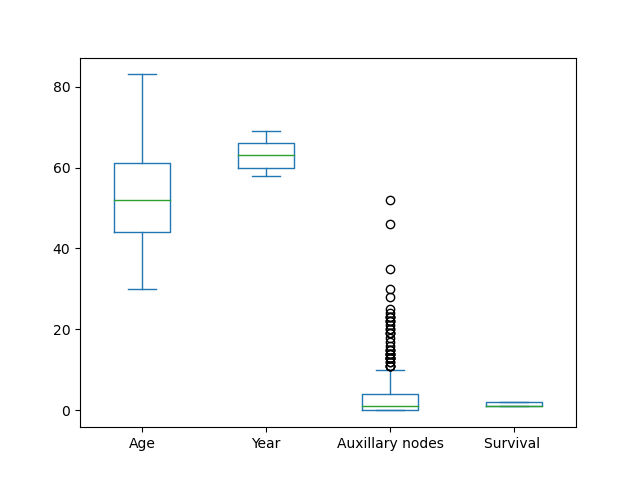

<AxesSubplot:>

In [162]:
# Box plot

%matplotlib notebook
df.plot.box()

In [ ]:
## Removing Outliers
## Auxillary nodes has a bit of outliers so we are going to remove them

In [163]:
## Max = 75% + 1.5 * (75% - 25%) (iqr)

maximum = 4 + 1.5 * (4 - 0)

<IPython.core.display.Javascript object>


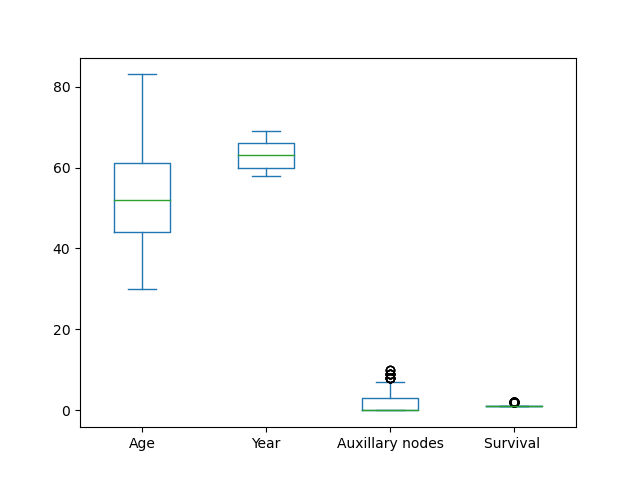

<AxesSubplot:>

In [164]:
# Create new data frame

new_df = df[df["Auxillary nodes"] <= maximum]

new_df.plot.box()

In [ ]:
## Correlation using the pearson method
# We won't remove any values

In [165]:
corr = new_df.corr()
corr

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092426,-0.108307,0.059688
Year,0.092426,1.000000,-0.006921,0.031328
Auxillary nodes,-0.108307,-0.006921,1.000000,0.236411
Survival,0.059688,0.031328,0.236411,1.000000


<AxesSubplot:>

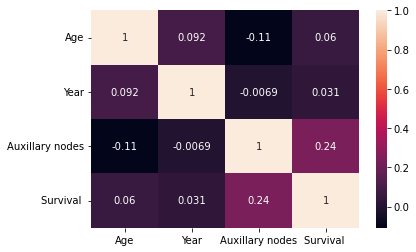

In [166]:
# Visualizing the correlation using Heatmap
# Finding which variable affects survival the most

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#sns.heatmap(corr)

plt.show()

corr_matrix=new_df.corr()
sns.heatmap(data=corr_matrix, annot=True)


In [ ]:
## Looking at the numbers on the Heatmap Survival is affected most by Auxillary nodes

In [169]:
# As shown above there are no variables that are perfectly correlated - we are not going to remove any variables.
# Remove correlated variables

final_df = new_df.drop(columns = ["Auxillary nodes"])

final_df

,Age,Year,Survival
0,30,62,1
1,30,65,1
2,31,59,1
3,31,65,1
4,33,58,1
...,...,...,...
300,75,62,1
301,76,67,1
302,77,65,1
303,78,65,2


In [ ]:
# Skewness
# Data is not skewed
# final_df.hist()
# new_df.hist()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

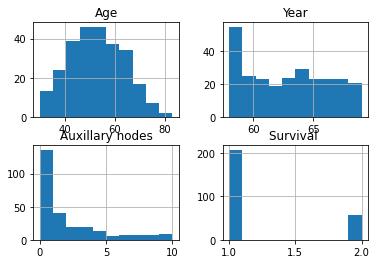

In [171]:
# Plotting data with skewness
new_df.hist()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Survival '}>, <AxesSubplot:>]],
      dtype=object)

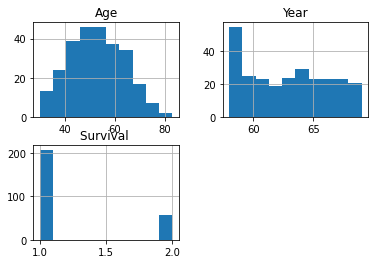

In [174]:
# Plotting data with skewness removed

final_df.hist()

In [27]:
# Standardization and Normalization - Scikit-learn

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler.fit(new_df)
scaled = scaler.fit_transform(new_df)
scaled_df = pd.DataFrame(scaled, columns = new_df.columns)
scaled_df

,Age,Year,Auxillary nodes,Survival
0,-2.078151,-0.258085,0.507659,-0.529333
1,-2.078151,0.661993,-0.672425,-0.529333
2,-1.986534,-1.178162,0.114297,-0.529333
3,-1.986534,0.661993,0.901020,-0.529333
4,-1.803300,-1.484854,3.261188,-0.529333
...,...,...,...,...
260,2.044615,-0.258085,-0.279064,-0.529333
261,2.136233,1.275378,-0.672425,-0.529333
262,2.227850,0.661993,0.507659,-0.529333
263,2.319467,0.661993,-0.279064,1.889171


## Question 1 Answers:

## 1.1 What can you conclude from methods of central tendency and deviation of variables?

In [ ]:
# The Mean values are not very far from each other indicating decent impact of each variable of the overal model.

# 1.2 Are there any correlated variables?

In [ ]:
Answer: No, there are no highly correlated variables so we did not remove any variables from the model

# 1.3 Interpret the skewness of the variables

In [ ]:
# The data is not skewed enventhough Auxillary looks like it is. It's a very important variable in the dataset. 
# Thes histograms are pretty much the same after removing skewness

## Question 2

In [ ]:
# Importing the libraries
Scikit-learn (sklearn) library imports
- train_test_split --> splitting data into training and testing datasets
- KFold --> cross-validation (k - number of folds)
- GridSearchCV --> hyperparameters tuning
- roc_auc_score --> Area under the curve for ROC
- plot_roc_curve --> plotting ROC curve
- SVC --> Support Vector Machine
- MLPClassifier --> Multiple layer perception (Neural Network)
- Classfication_report --> performance metrics for classification 
- confusion_matrix --> predictated vs actual values
- confusionMatrixDisplay --> visualization for confusion_matrix

In [73]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt

# Scikit learn - machine learning algorithms and methods
# train_test_split --> splitting data into training and testing

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [6]:
# Import data

columns =['Age', 'Year', 'Nodes', 'Class']
data = pd.read_csv("cancer.csv", header = 0, names = columns)
data.head()

,Age,Year,Nodes,Class
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
## Data Exploration

In [7]:
data.shape

(305, 4)

In [ ]:
## Describe

In [8]:
data.describe()

,Age,Year,Nodes,Class
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
data.corr()

,Age,Year,Nodes,Class
Age,1.000000,0.092623,-0.066548,0.064351
Year,0.092623,1.000000,-0.003277,-0.004076
Nodes,-0.066548,-0.003277,1.000000,0.286191
Class,0.064351,-0.004076,0.286191,1.000000


## Data Preprocessing

In [84]:
## data = pd.read_csv("cancer.csv")

# Create features/inputs
X = data.drop(columns = ["Class"])

# Create the output/class
y = data["Class"]

# Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)

data

,Age,Year,Nodes,Class
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


## (2.1) logistic Regression

In [ ]:
Hyperparameters to tune:
solver: [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
penalty: [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
C: [100, 10, 1.0, 0.1, 0.01]

              precision    recall  f1-score   support

           1       0.82      0.94      0.88        97
           2       0.45      0.20      0.28        25

    accuracy                           0.79       122
   macro avg       0.64      0.57      0.58       122
weighted avg       0.74      0.79      0.75       122



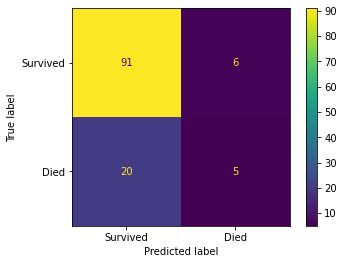

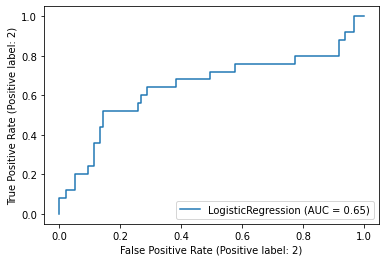

In [45]:
# Defining and training the model
clf = LogisticRegression(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 10).fit(X_train, y_train)

# Evaluating the model 
clf.score(X_test, y_test)

# Making predictions
y_pred = clf.predict(X_test)

# Creating the labels
labels = ["Survived", "Died"]

# Developing the Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()

# Print Performance Metrics 
print(classification_report(y_test, y_pred, labels = clf.classes_))

# Plotting ROC Curve
plot_roc_curve(clf, X_test, y_test) 
plt.show()

## (2.2) Random forest

In [ ]:
## Random forest
Hyperparameters to tune:
max_features: [‘sqrt’, ‘log2’]
n_estimators: [10, 100, 1000]
max_depth

              precision    recall  f1-score   support

           1       0.83      0.91      0.87        97
           2       0.44      0.28      0.34        25

    accuracy                           0.78       122
   macro avg       0.63      0.59      0.60       122
weighted avg       0.75      0.78      0.76       122



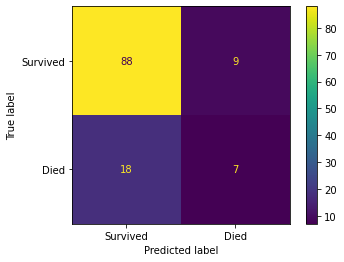

In [46]:
# Developing and fitting the random forest algorithm
rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)

# Making predictions
rf_pred = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, rf_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = clf.classes_))

## (2.3) Support Vector Machine

In [ ]:
Hyperparameters to tune
kernels: [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’]
C: [100, 10, 1.0, 0.1, 0.001]
gamma: [100, 10, 1.0, 0.1

              precision    recall  f1-score   support

           1       0.80      0.97      0.88        97
           2       0.40      0.08      0.13        25

    accuracy                           0.79       122
   macro avg       0.60      0.52      0.51       122
weighted avg       0.72      0.79      0.73       122



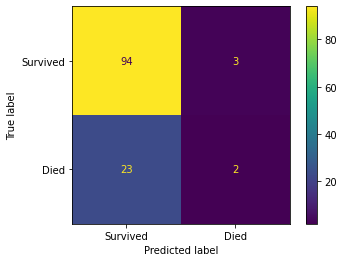

In [87]:
# Developing and fitting the Support Vector Machine
svm = SVC(random_state = 0, kernel = "rbf", gamma = 1).fit(X_train, y_train)

# Making predictions
svm_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_))

## (2.4) Neural Network

In [ ]:
Hyperparameters to tune
hidden_layer_sizes
solver: [‘lbfgs’, ‘sgd’, ‘adam’]
learning_rate: [‘constant’, ‘invscaling’, ‘adaptive’]
learning_rate_init
activation - [‘identity’, ‘logistic’, ‘tanh’, ‘relu’]

              precision    recall  f1-score   support

           1       0.82      0.87      0.84        97
           2       0.35      0.28      0.31        25

    accuracy                           0.75       122
   macro avg       0.59      0.57      0.58       122
weighted avg       0.73      0.75      0.73       122



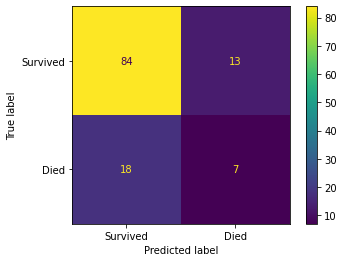

In [85]:
# Developing and fitting the Neural Network

nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)

# Making predictions
nn_pred = nn.predict(X_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = nn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = clf.classes_))

## Question 3

## Implement k-fold cross validation

In [49]:
# Implement k-fold cross validation

# Specify the number of splits - 10
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.6666666666666666


In [ ]:
# Computing the above accuracy results gives 0.7272

In [178]:
## Accuracy Score

score_nn = accuracy_score(y_test, nn_pred)
score_nn

0.7459016393442623

In [ ]:
## Validation set of 0.72 is less than 0.745 so the model is not overfitting

## Implement Grid Search for Parameter Tuning

In [22]:
# Implement grid search for parameter tuning


parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

{'C': 1, 'kernel': 'linear'}

## Question 4

In [ ]:
## *Professor I used Call Stack approach to develop a function for my neural Network Model*

In [127]:
def ml_learning():
    get_data()

def get_data():
    nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)

    # Plotting ROC Curve
    plot_roc_curve(nn, X_test, y_test) 
    plt.show()
    #nn_pred = nn.predict(X_test)

    #cm_nn = confusion_matrix(y_test, nn_pred, labels = nn.classes_)
    #disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
    #disp.plot()
    print(classification_report(y_test, nn_pred, labels = clf.classes_))

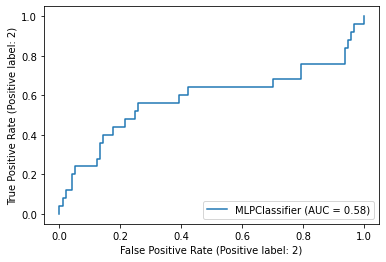

              precision    recall  f1-score   support

           1       0.82      0.87      0.84        97
           2       0.35      0.28      0.31        25

    accuracy                           0.75       122
   macro avg       0.59      0.57      0.58       122
weighted avg       0.73      0.75      0.73       122



In [128]:
ml_learning()

## Answers

In [ ]:
# logistic Regression performed the best overall